# LOGISTIC REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math as math

## 1. Cost Functions and the concept of Regularisation

• Logistic Regression is a discrete value Classification Method.<br>
• It is used to classify data usually to a binary setup (Yes/No, 1/0, etc.).<br><br>
<b>Regularisation</b><br>
• Regularisation is applicable for both linear and logistic regression models.<br>
• It comes into play when polynomial cost functions are used for formulation.<br>
• High $\theta$ values result in overfit learning models. Overfit models do not scale well to the test data. This problem is more pronounced when polynomial curves are used to fit the regression model instead of linear functions.<br>
• Regularisation is the process of decreasing the magnitude of parameters $\theta$ by multiplying them with a constant factor lambda ($\lambda$).<br>• With every iteration of Gradient Descent, $\theta$ will be reduced by a factor of $\lambda$. This helps to counter the formulation of high variance functions (i.e. avoids overfitting).<br> • If $\lambda$ = 0, then it results in the usual equations. <br>• The regularisation factor is not applicable for the bias term ($\theta_0$).<br><br>

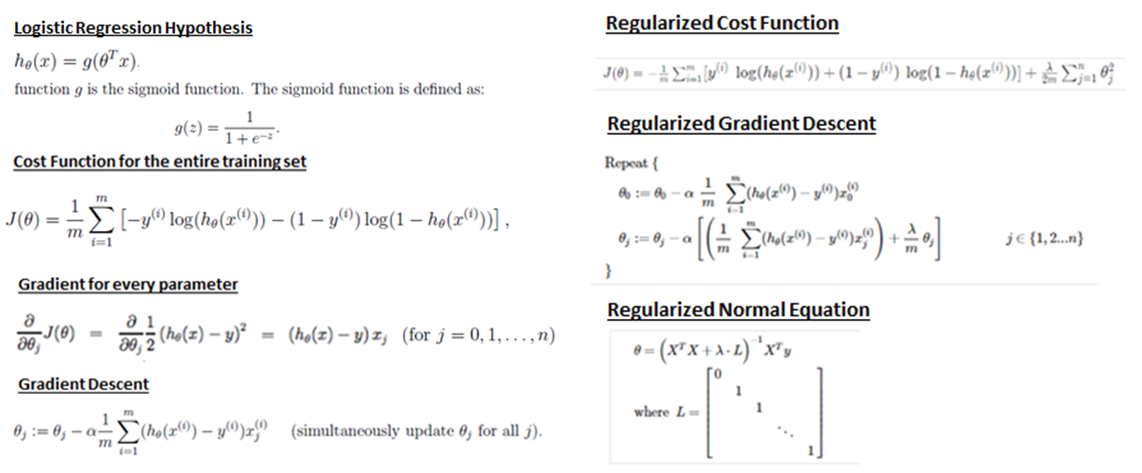

In [2]:
from IPython.display import Image
Image(filename = "D:\Python_Work\Machine_Learning\Coursera\Exercises\Logistic_Regression\LgR.png")

In [3]:
def feat_norm(X):
    mu = np.mean(X, axis=0)
    sd = np.std(X, axis=0, ddof=1)
    X_norm = (X- mu)/sd
    return X_norm, mu, sd

def sigmoid(theta, X):
    z = X.dot(theta)
    h = 1/(1+np.exp(-z))
    return h

def cost_grad(theta, X, y, lmb):
    m,n = X.shape
    h = sigmoid(theta, X)
    error = h - y
    
    lg_h1 = np.log(h)
    lg_h2 = np.log(1-h)
    
    J = (-1/m) * sum((y.T.dot(lg_h1)) + (1-y).T.dot(lg_h2))
    reg_term = (lmb/(2*m)) * sum(theta[1:]**2)
    Reg_J = J + reg_term
    
    G = (1/m) * (X.T.dot(error))
    regg_term = (lmb/m) * theta[1:]
    Reg_G = np.zeros([len(G),1])
    Reg_G[0] = G[0]
    Reg_G[1:] = G[1:] + regg_term
    
    return Reg_J, Reg_G

def grad_descent(theta, X, y, alpha, lmb, num_iter): 
    J_his = []
    for i in range(num_iter):
        J, G = cost_grad(theta, X, y, lmb)
        
        theta[0] = theta[0] - (alpha * G[0])
        theta[1:] = theta[1:] - (alpha * G[1:])
        
        J_his.append(J)
    return J_his, theta

## 2. Linear Decision Boundary

### Data Visualisation

In [4]:
data = np.genfromtxt('ex2data1.txt', delimiter=',')
print('The first two columns are the data while the third column is the classification vector.\n')
print(data[:5])

X = data[:,:2]
y = data[:,2]

The first two columns are the data while the third column is the classification vector.

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]


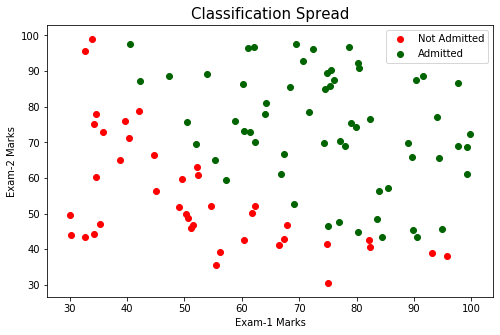

In [5]:
dotfig, ax1 = plt.subplots(1,1,figsize=(8,5))

lst_0 = []
lst_1 = []
for i in range(len(X)):
    if y[i] == 0:
        lst_0.append(i)
    else:
        lst_1.append(i)

for i in lst_0:
    ax1.scatter(X[i][0], X[i][1], color = 'red', label='Not Admitted' if i==0 else "")
for i in lst_1:
    ax1.scatter(X[i][0], X[i][1], color = 'darkgreen', label='Admitted' if i==3 else "")

ax1.set_title('Classification Spread', fontsize=15)
ax1.set_xlabel('Exam-1 Marks')
ax1.set_ylabel('Exam-2 Marks')
ax1.legend()
plt.show()

### Calculation and Optimisation

In [6]:
X = data[:,:2]
y = data[:,2].reshape(-1,1)

X_norm, mu, sd = feat_norm(X) # --> Feature Normalisation for smooth Gradient Descent
m,n = X_norm.shape
X_upd = np.append(np.ones([m,1]), X_norm, axis=1)
m,n = X_upd.shape
theta = np.zeros([n,1])

In [7]:
# Finding cost and gradient for zero parameters
J, G = cost_grad(theta, X_upd, y, lmb=0)
print(f'1. The initial cost for zero parameters is {round(J[0], 3)}.')
print(f'\n2. The initial gradients are:\n{G}.')

1. The initial cost for zero parameters is 0.693.

2. The initial gradients are:
[[-0.1       ]
 [-0.27981946]
 [-0.24972806]].


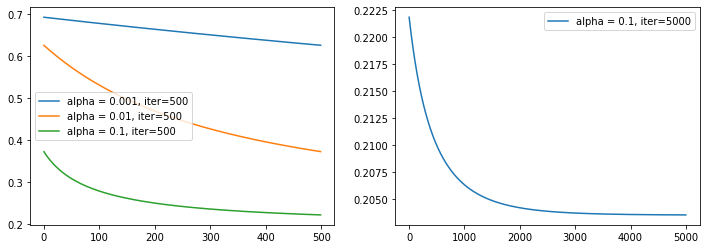

In [8]:
# Optimisation using Gradient Descent
J_his_1, theta_1 = grad_descent(theta, X_upd, y, alpha=0.001, lmb=0, num_iter=500)
J_his_2, theta_2 = grad_descent(theta, X_upd, y, alpha=0.01, lmb=0,num_iter=500)
J_his_3, theta_3 = grad_descent(theta, X_upd, y, alpha=0.1, lmb=0,num_iter=500)
J_his_4, theta_4 = grad_descent(theta, X_upd, y, alpha=0.1, lmb=0,num_iter=5000)

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(J_his_1, label = 'alpha = 0.001, iter=500')
ax[0].plot(J_his_2, label = 'alpha = 0.01, iter=500')
ax[0].plot(J_his_3, label = 'alpha = 0.1, iter=500')
ax[0].legend()

ax[1].plot(J_his_4, label = 'alpha = 0.1, iter=5000')
ax[1].legend()
plt.show()

In [9]:
print('It is observed that more iterations and a higher alpha is required to achieve convergence.')
theta_final = theta_4
print(f'\n1. The optimised cost = {round(J_his_4[-1][0],3)}.\
\n2. The converged parameters are:\n{theta_final}.')

It is observed that more iterations and a higher alpha is required to achieve convergence.

1. The optimised cost = 0.204.
2. The converged parameters are:
[[1.69402863]
 [3.96047471]
 [3.69317455]].


### Decision Boundary
<blockquote>
We know that h(x) = g(z) where g(z) is a sigmoid function for logistic regression. <br>
Here, z = $\theta_0 + \theta_1 x_1 + \theta_2 x_2$ and represents a line. <br>
Therefore, h(x) = g($\theta_0 + \theta_1 x_1 + \theta_2 x_2$) = g(z)<br>

The curve of the sigmoid function has z as X-axis, y (0 to 1) as y-axis and the curve is g(z). <br>
1. When z >= 0, then g(z) > 0.5 and y = 1. [Note: g(z) = h(x)]<br> 
2. When z < 0, then g(z) < 0.5 and y = 0. [Note: g(z) = h(x)]<br> 

Therefore, for a z function with two features, the decision boundary line will be obtained by making z=0 i.e - <br> <br>
        $\theta_0 + \theta_1 x_1 + \theta_2 x_2$ = 0 <br> <br>
    Solving above equation, we get, <br> <br>
    $x_2$ = $ \frac {-(\theta_0 + \theta_1 x_1)}{\theta_2} $ <br> <br>
    Thus, for any two values of $x_1$, we can define a decision boundary. <br>
    The $x_1$ values will be preferably the minimum and maximum values from the feature set X('Exam1') 

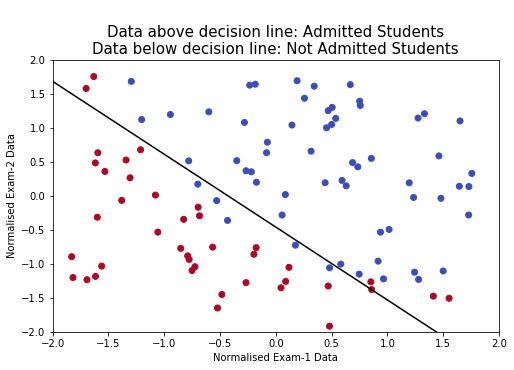

In [10]:
# Setting up x1 and x2.

x1 = [X_norm[:,1].min()-1, X_norm[:,1].max()+1]
x2 = []
for i in range(len(x1)):
    x2.append((-(theta_final[0] + theta_final[1]*x1[i]))/theta_final[2])
    
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.scatter(X_norm[:,0],X_norm[:,1],c=y.ravel(), cmap='coolwarm_r')
ax.plot(x1, x2, color='black')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_xlabel('Normalised Exam-1 Data')
ax.set_ylabel('Normalised Exam-2 Data')
ax.set_title('\nData above decision line: Admitted Students\
\nData below decision line: Not Admitted Students', size=15)
plt.show()

### Prediction Accuracy

In [11]:
def accuracy(theta, X, y):
    m,n = X.shape
    h = X.dot(theta)
    
    pred = np.zeros([m,1])
    count = 0
    
    for i in range(len(h)):
        if h[i] > 0.5:
            pred[i] = 1
        if pred[i] == y[i]:
            count += 1

    return (count/m)*100

print(f'The classification accuracy for the given data set is {accuracy(theta_final, X_upd, y)} %.')

The classification accuracy for the given data set is 89.0 %.


## 3. Polynomial Decision Boundary

### Data Visualisation

In [12]:
data2 = np.genfromtxt('ex2data2.txt', delimiter=',')
print('The first two columns are the data while the third column is the classification vector.\n')
print(data2[:5])

X2 = data2[:,:2]
y2 = data2[:,2]

The first two columns are the data while the third column is the classification vector.

[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]


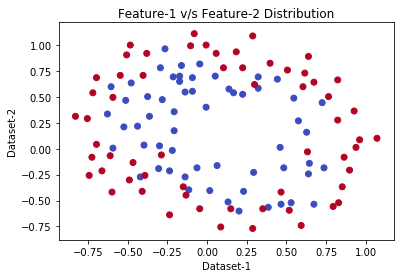

The spread of data points is clearly non-linear.


In [13]:
fig, ax = plt.subplots(1,1)
ax.scatter(X2[:,0], X2[:,1], c=y2, cmap='coolwarm_r')
ax.set_xlabel('Dataset-1')
ax.set_ylabel('Dataset-2')
ax.set_title('Feature-1 v/s Feature-2 Distribution', size=12)
plt.show()
print('The spread of data points is clearly non-linear.')

### Polynomial function

In [14]:
X2 = data2[:,:2]
y2 = data2[:,2].reshape(-1,1)
X2_norm, mu2, sd2 = feat_norm(X2)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)

X2_upd = poly.fit_transform(X2_norm)

print(f'The features are first normalised and scikit _poly function is used to increase the order \
of the polynomial. \nBias column is automatically added by scikit:\n\n{X2_upd[:5,:3]}.')
print('\nThe polynomial transformation factor used for this dataset is 6')
print('The number of parameters obtained from polynomial transformation are', X2_upd.shape[1])

The features are first normalised and scikit _poly function is used to increase the order of the polynomial. 
Bias column is automatically added by scikit:

[[ 1.         -0.00707114  0.99368059]
 [ 1.         -0.29702966  0.9655513 ]
 [ 1.         -0.54059571  0.97961594]
 [ 1.         -0.8653491   0.61393515]
 [ 1.         -1.14371202  0.54361192]].

The polynomial transformation factor used for this dataset is 6
The number of parameters obtained from polynomial transformation are 28


### Calculation and Optimisation

In [15]:
m,n = X2_upd.shape
theta = np.zeros([n,1])

In [16]:
# Finding cost and gradient for zero parameters
J, G = cost_grad(theta, X2_upd, y2, lmb=1)
print(f'The initial cost for zero parameters is {round(J[0], 3)}.')

The initial cost for zero parameters is 0.693.


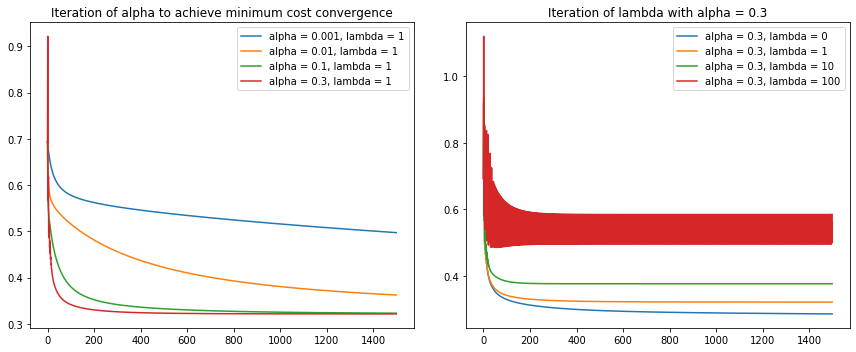

In [17]:
# Gradient Descent Iterations
alpha_iter = [0.001, 0.01, 0.1, 0.3]
lmb_iter = [0, 1, 10, 100]
J_his_alpha = []
J_his_lmb = []
theta_lmb = []

fig, ax = plt.subplots(1,2, figsize=(12,5))

for i in range(len(alpha_iter)):
    theta = np.zeros([n,1])
    J_his, theta_iter = grad_descent(theta, X2_upd, y2, alpha = alpha_iter[i], lmb=1, num_iter=1500)
    J_his_alpha.append(J_his)
    ax[0].plot(J_his_alpha[i], label=f'alpha = {alpha_iter[i]}, lambda = 1')
    ax[0].set_title('Iteration of alpha to achieve minimum cost convergence')
    ax[0].legend()
    
for i in range(len(lmb_iter)):
    theta = np.zeros([n,1])
    J_his, theta_iter = grad_descent(theta, X2_upd, y2, alpha = 0.3, lmb=lmb_iter[i], num_iter=1500)
    J_his_lmb.append(J_his)
    theta_lmb.append(theta_iter)
    ax[1].plot(J_his_lmb[i], label=f'alpha = 0.3, lambda = {lmb_iter[i]}')
    ax[1].set_title('Iteration of lambda with alpha = 0.3')
    ax[1].legend()
    
plt.tight_layout()
plt.show()

### Decision Boundary and Prediction Accuracy

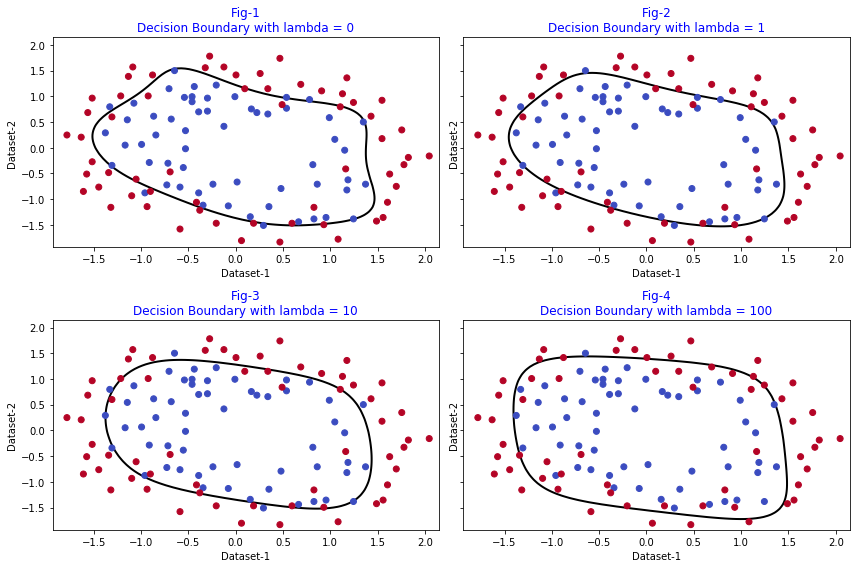

In [18]:
minv = np.min(X2_norm)
maxv = np.max(X2_norm)
xm = np.linspace(minv-0.1, maxv+0.1, 100)
ym = np.linspace(minv-0.1, maxv+0.1, 100)
xx, yy = np.meshgrid(xm, ym)

def zz(theta_opt):
    zz = np.zeros([len(xx),len(yy)])
    for i in range(len(xx)):
        for j in range(len(xx)):
            x_vector = np.array([[xx[i][j], yy[i][j]]])
            x_vector = poly.fit_transform(x_vector)
            zz[i][j] =  x_vector.dot(theta_opt)
    return zz

fig, ax = plt.subplots(2,2,figsize=(12,8), sharey=True)
i=0
for j in range(2):
    ax[i,j].scatter(X2_norm[:,0], X2_norm[:,1], c=y2.ravel(), cmap='coolwarm_r')
    ax[i,j].set_xlabel('Dataset-1')
    ax[i,j].set_ylabel('Dataset-2')
    ax[i,j].contour(xx, yy, zz(theta_lmb[j]), [0], colors='black', linewidths = 2, zorder=0)
    ax[i,j].set_title(f'Fig-{j+1}\nDecision Boundary with lambda = {lmb_iter[j]}', size=12, color='blue')

i=1
for j in range(2,4,1):
    ax[i,j-2].scatter(X2_norm[:,0], X2_norm[:,1], c=y2.ravel(), cmap='coolwarm_r')
    ax[i,j-2].set_xlabel('Dataset-1')
    ax[i,j-2].set_ylabel('Dataset-2')
    ax[i,j-2].contour(xx, yy, zz(theta_lmb[j]), [0], colors='black', linewidths = 2, zorder=0)
    ax[i,j-2].set_title(f'Fig-{j+1}\nDecision Boundary with lambda = {lmb_iter[j]}', size=12, color='blue')

plt.tight_layout()
plt.show()

In [19]:
print(f'The classification accuracy with lambda = 0 (Fig-1) is {round(accuracy(theta_lmb[0], X2_upd, y2),2)} %.')
print(f'The classification accuracy with lambda = 1 (Fig-2) is {round(accuracy(theta_lmb[1], X2_upd, y2),2)} %.')
print(f'The classification accuracy with lambda = 10 (Fig-3) is {round(accuracy(theta_lmb[2], X2_upd, y2),2)} %.')
print(f'The classification accuracy with lambda = 100 (Fig-4) is {round(accuracy(theta_lmb[3], X2_upd, y2),2)} %.')

The classification accuracy with lambda = 0 (Fig-1) is 86.44 %.
The classification accuracy with lambda = 1 (Fig-2) is 86.44 %.
The classification accuracy with lambda = 10 (Fig-3) is 84.75 %.
The classification accuracy with lambda = 100 (Fig-4) is 82.2 %.


<blockquote>• For the given data, the points that lie within the decision boundary are considered to be successful tests (y=1).<br>
    • From the accuracy calculations, it's seen that iterations with $\lambda$ = (0, 1) is the most accurate. But they are also possibly overfit and may not scale well to the test data.<br>
    • Although iteration with $\lambda$ = 100 is more spread out w.r.t the fit, the noise observed during cost convergence is to be taken into account.<br><br>
    <i><b>Therefore, for a given alpha, increasing the regularisation factor $\lambda$ will prevent overfitting the model.</b><br><br>
        For the given training set, best results can be taken as Fig-3:<br>
        • Learning rate, $\alpha$ = 0.3<br>
        • Regularisation factor, $\lambda$ = 10<br>
    • Training Accuracy achieved = 84.75 %.</i> <br>

### Prediction from Normal Equation
Per Normal Equation,<br><br>
$\theta = (X^TX + \lambda{L})^{-1}X^Ty$

In [20]:
X2 = data2[:,:2]
y2 = data2[:,2].reshape(-1,1)

In [21]:
X2p = poly.fit_transform(X2)
m,n = X2p.shape
lp = np.ones([n,1])
L = np.diag(lp.flatten())
L[0,0] = 0
lmb = 10

term1 = X2p.T.dot(X2p)
term2 = lmb * L
inv_term = np.linalg.inv(term1 + term2)
term3 = X2p.T.dot(y2)

theta_eq = inv_term.dot(term3)

In [22]:
print(f'The classification accuracy for lambda = 10 using Normal Equation is {round(accuracy(theta_eq, X2p, y2),2)} %.')

The classification accuracy for lambda = 10 using Normal Equation is 83.05 %.
